# Linear Regression

# Introduction

### Objective
Learn and perform Linear Models for predicting outputs, both using overall data and performing online learning, while understanding in detail the concepts in linear algebra behind the methods used.

### Tasks performed
1. Learnt linear algebra, specifically matrix manipulation.
2. Implemented the methods using numpy in Python.
3. Performed regression and analyzed outputs and error produced by the model.
4. Studied the performance of online learning.

### Main goal - Studying Least Squares and Least Mean Squares as training algorithms
The Least Squares method calculates the error term by squaring the difference between the predicted and target values. Further details are in the LinearRegress section.

The Least Mean Squares method calculates the error term online by taking the mean of the square of the differences between the predicted and target values. Further details are in the LMS section.

# Data

## Introduction

This is a regression dataset for determining whether the price of houses. It has been taken from Kaggle datasets (https://www.kaggle.com/shivachandel/kc-house-data). Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.

## Data Visualization

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
data_regression = pd.read_csv('kc_house_data.csv')

In [3]:
data_regression.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print('T: ', 'price')
print('Rows: ', len(data_regression))
print('Columns: ', len(data_regression.columns))

T:  price
Rows:  21613
Columns:  21


In [5]:
data_regression.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data_regression.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
data_regression.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

The data looks clean, and therefore does not seem to need any pre-processing. However, based on earlier analysis, here are some pre-processing steps that are being performed:
1. Setting the index to the 'id' column. 
2. Adding a new column for cumulative number of bedrooms and bathrooms.
3. Removing the sqft_living15 and sqft_lot15 features since their significance seems to have been captured already in sqft_living and sqft_lot, based on the correlation. Also removing the individual number of bedrooms, number of and bathrooms.

In [8]:
data_regression.set_index('id', inplace=True)

In [9]:
data_regression['no_of_bedrooms_and_bathrooms'] = data_regression['bathrooms'] + data_regression['bedrooms']

In [10]:
data_regression.drop(columns={'sqft_living15', 'sqft_lot15', 
                              'bathrooms', 'bedrooms'}, inplace=True)

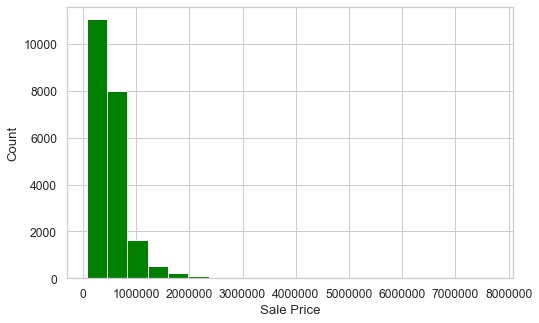

In [11]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data_regression['price'], norm_hist=False, kde=False, bins=20, color=['green'], hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

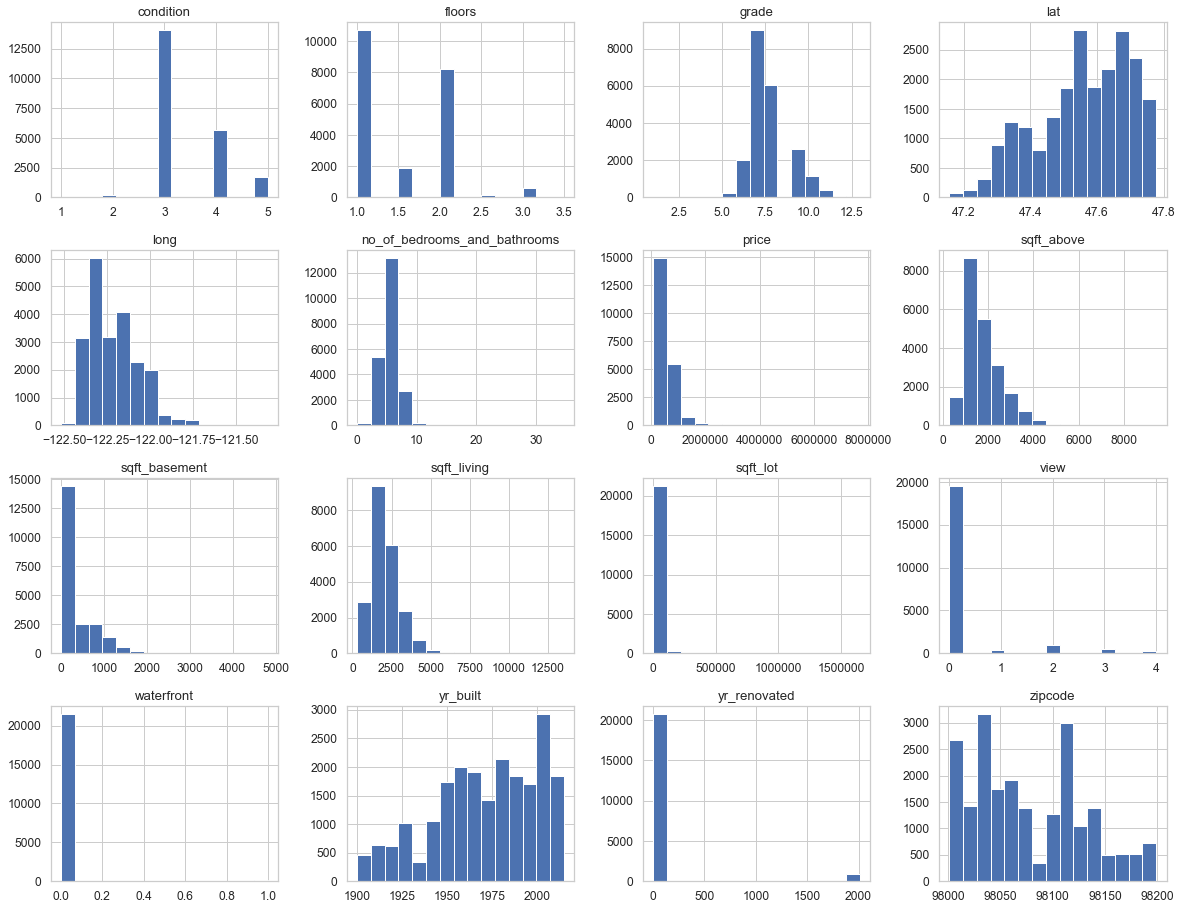

In [12]:
data_regression.select_dtypes(include='number').hist(bins=15, figsize=(20, 20), layout=(5, 4));

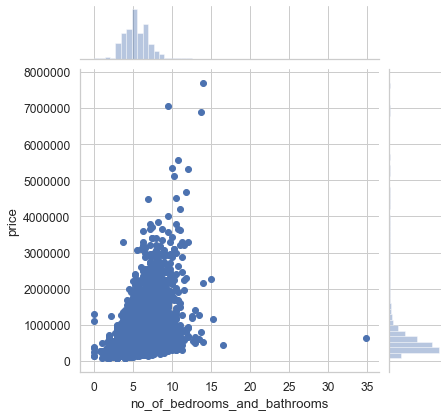

In [13]:
sns.jointplot(x=data_regression['no_of_bedrooms_and_bathrooms'], y=data_regression['price']);

The price seems to show an increasing trend when the number of bedrooms and the number of bathrooms are added together as a feature.

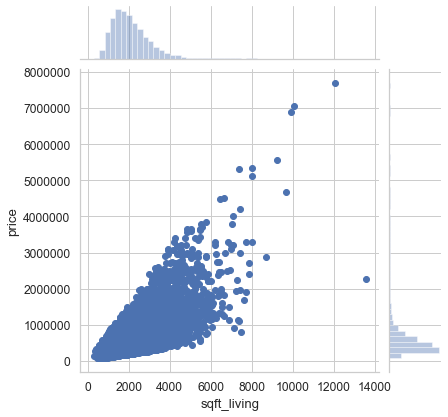

In [14]:
sns.jointplot(x=data_regression['sqft_living'], y=data_regression['price']);

The price shows a clear increasing trend with the sqft_living feature.

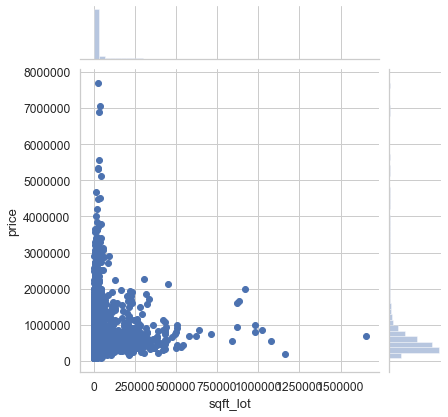

In [15]:
sns.jointplot(x=data_regression['sqft_lot'], y=data_regression['price']);

Both price and sqft_lot are skewed towards a tail.

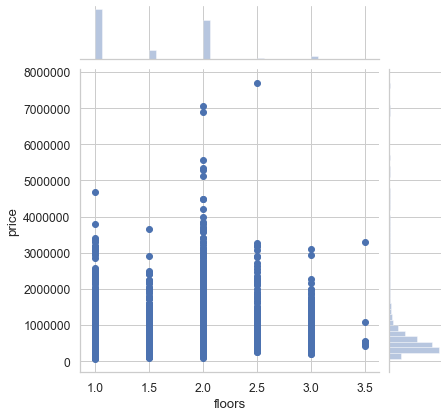

In [16]:
sns.jointplot(x=data_regression['floors'], y=data_regression['price']);

It seems like the number of floors does not have a clear relationship with the price.

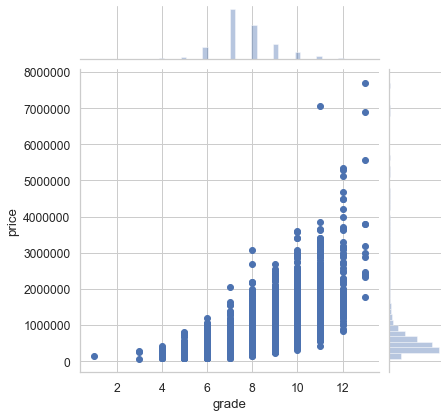

In [17]:
sns.jointplot(x=data_regression['grade'], y=data_regression['price']);

The grade definitely shows an increasing trend for predicting the price of the house.

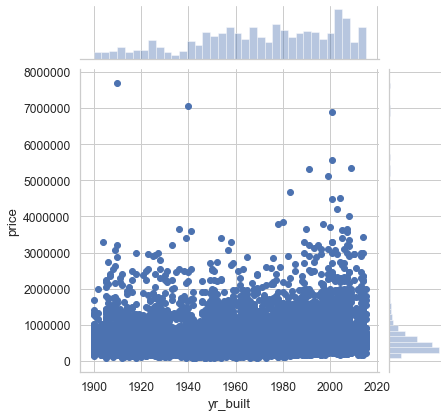

In [18]:
sns.jointplot(x=data_regression['yr_built'], y=data_regression['price']);

The year the house was built does not seem to have a correlation with the price of the house.

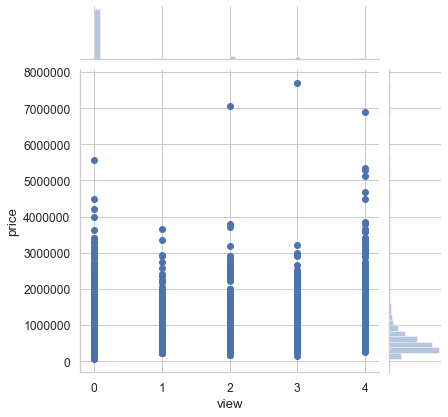

In [19]:
sns.jointplot(x=data_regression['view'], y=data_regression['price']);

The rating of the view outside the house seems to show a positive trend with the price.

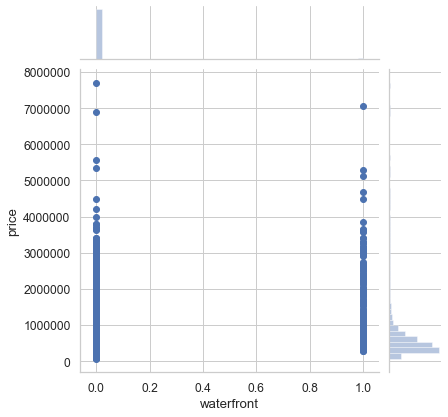

In [20]:
sns.jointplot(x=data_regression['waterfront'], y=data_regression['price']);

Having a waterfront does seem to have an effect on the house price.

## Main observations

1. The sale price is generally skewed towards 0 to 1 million, and therefore it might be harder to predict the prices of houses that might be more expensive than that.
2. The combined number of bedrooms and bathrooms also show a positive association with the house prices.
3. The sqft_living shows a positive association with the house prices.
4. The grade given to a property shows a positive association with the price.

# Review
## Linear models

Linear models work by trying to fit a line that can predict the output variable such that the deviation from actual output variable values is the least. This minimization is usually carried out by defining an error function that can account for the amount of errors made while fitting a line to the output variable model.

The easiest way to do this is to take the difference of the predicted value and the actual value. However, when the differences could be negative and positive, they can cancel each other out and show a good fit even when the fit is bad. Therefore we need that the error function somehow give us only positive values.

A solution to this is using the absolute value of the difference. However, minimizing a value requires its gradient to be known, and derivating an absolute value function is difficult. Therefore the commonly used way to get positive values is to square the difference. 

This is also helpful because it ends up making an error matter much more than just the value, thereby helping the model evaluate an error more seriously. Finally, it is common to take the mean of all the errors made by the model to evaluate the overall errors it has made. This is known as the Least Sqaures (LS) linear model. 

However, in an online learning environment, we do not have access to all the error terms beforehand. Therefore for online learning, Least Mean Squares (LMS) linear model are more commonly used.

### Super Class Definition

In [21]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    @abstractmethod
    def train(self, X, T):
        pass
    @abstractmethod
    def use(self, X):
        pass
    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    ############## abstract functions ##################
    ####################################################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """    
        pass

#### Explanation
The Super Class describes 2 main classes:
1. BaseModel - this is the main super class. It describes 2 main abstract methods, `train` and `use` that need to be overriden to be able to use any model that inherits the BaseModel.
2. LinearModel - this is an abstract class that inherits the BaseModel, and is the skeleton for both the LMS and LS linear models. It consists of the following functions:
    - `__init__` constructor: initializes the model's weights as `None`.
    - `_check_matrix`: checks for the length of the matrix passed to it to be 2 dimensional. If not, raises an exception.
    - `add_ones`: adds a basis of ones to the matrix passed to it (usually the training data)
    - `train` and `use`: abstract methods that override the similarly named inherited methods from BaseModel.

### Least Squares

In [22]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        Y = X1 @ self.w
        return Y

#### Explanation:
The least squares LinearRegress model inherits the LinearModel and overrides its functions. Individually:
1. The `train` function updates the weights of the model based on all the inputs provided to it.
2. The `use` function calculates the predictions made by the model.

### Least Mean Squares

In [23]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """    
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for (x, t) in zip(X, T):
            self.train_step(x, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x1 = np.hstack((np.ones(1), x))
        n = x1.shape[0]
        if (self.w is None):
            self.w = np.zeros(n)
        y = self.w @ x1
        trial = self.w
        trial -= self.alpha * (y-t)*x1
    
    # apply the current model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        Y = X1 @ self.w
        Y.shape = (X1.shape[0], 1)
        return Y

#### Explanation
The LMS model inherits the LinearModel and overrides its functions as well. Individually:
1. The `train` function updates the weights of the model online by training the model one step at a time.
2. The `use` function calculates the predictions made by the model.

### Usage Examples

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

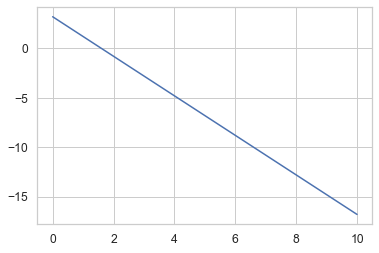

In [25]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))
plt.show()

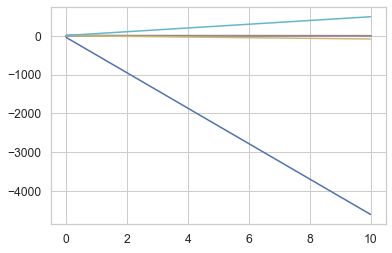

In [26]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))
plt.show()

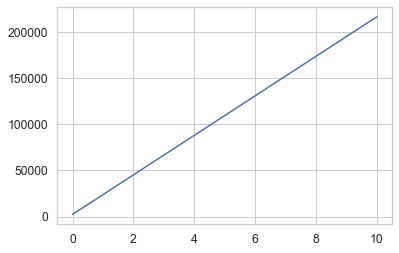

In [27]:
lms.train(X, T)
plt.plot(lms.use(X))
plt.show()

# Experiments

#### Choosing training and testing dataset size

In [28]:
print('Total size of data: ', len(data_regression))
print('Chosen subset size: ', 5000)
print('80% of data: ', 5000*.8)

Total size of data:  21613
Chosen subset size:  5000
80% of data:  4000.0


#### Dividing data into input and output data after taking a sample of the data

In [29]:
data = data_regression.sample(5000)

In [30]:
X = data[['sqft_living', 'no_of_bedrooms_and_bathrooms', 'grade', 'condition', 'waterfront']].copy()
T = data['price'].copy()

In [31]:
X_train = np.array(X.iloc[:4000])
T_train = np.array(T.iloc[:4000])

X_test = np.array(X.iloc[4000:])
T_test = np.array(T.iloc[4000:])

## LS Experiment
#### Code

In [32]:
lr = LinearRegress()
lr.train(X_train, T_train)
Y_predicted = lr.use(X_test)

#### Visualizing results

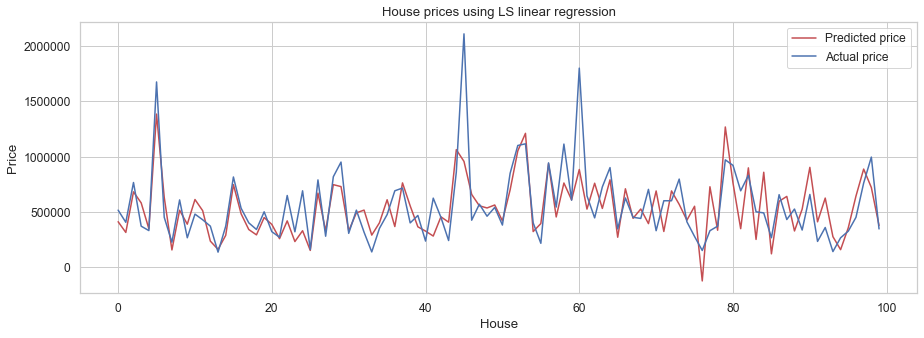

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(Y_predicted[100:200], 'r')
plt.plot(T_test[100:200], 'b')
plt.title('House prices using LS linear regression')
plt.xlabel('House')
plt.ylabel('Price')
plt.legend(['Predicted price', 'Actual price'])
plt.show()

#### RMSE

In [36]:
mean_squared_error(T_test, Y_predicted, squared=False)

209397.7924539861

#### Analysis
The plot shows the predicted values are somewhat close to the actual values.

## LMS Experiment
#### Code

In [37]:
lms = LMS(0.0001)
lms.train(X_train, T_train)
Y_predicted = lms.use(X_test)

/Users/khyatimahajan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in matmul
/Users/khyatimahajan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in multiply


#### Analysis
The online training encounters the exploding gradient problem, therefore trying normalization before training. Analysis continued after getting results...

In [38]:
X = (X - X.min())/(X.max() - X.min())
T = (T - T.min())/(T.max() - T.min())

X_train = np.array(X.iloc[:4000])
T_train = np.array(T.iloc[:4000])

X_test = np.array(X.iloc[4000:])
T_test = np.array(T.iloc[4000:])

In [39]:
lms = LMS(0.001)
lms.train(X_train, T_train)
Y_predicted = lms.use(X_test)

#### Visualizing results

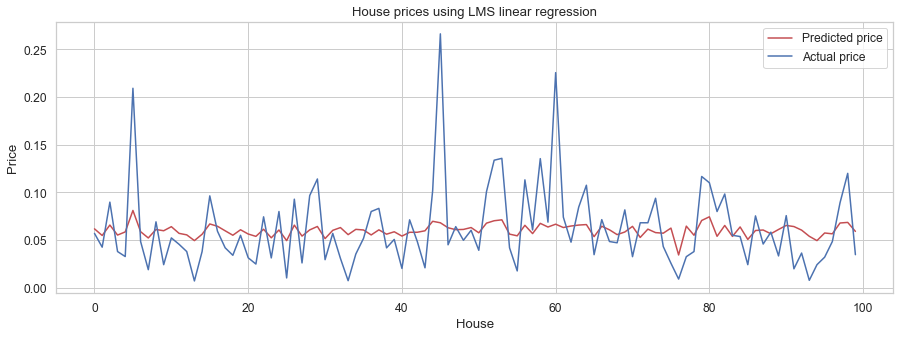

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(Y_predicted[100:200], 'r')
plt.plot(T_test[100:200], 'b')
plt.title('House prices using LMS linear regression')
plt.xlabel('House')
plt.ylabel('Price')
plt.legend(['Predicted price', 'Actual price'])
plt.show()

#### RMSE

In [41]:
mean_squared_error(T_test, Y_predicted, squared=False)

0.040120112530710496

#### Analysis (contd)
The LMS plot does not perform as well as the LS method. The RMSE is high, and the plot also shows that the performance is not very good.

To compare, normalization should improve LS regression performance as well...

In [42]:
lr = LinearRegress()
lr.train(X_train, T_train)
Y_predicted = lr.use(X_test)

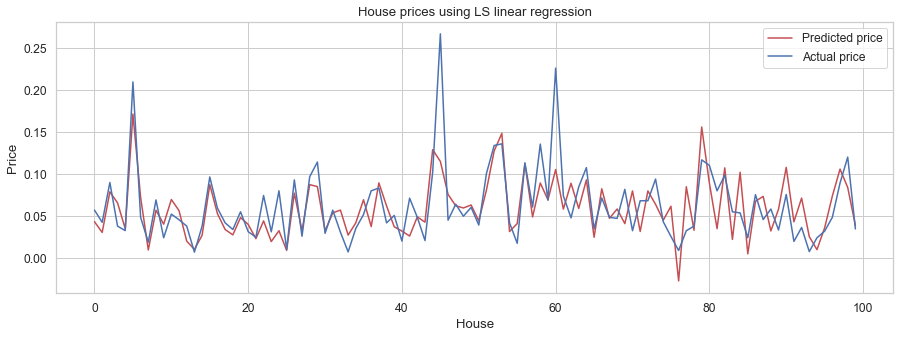

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(Y_predicted[100:200], 'r')
plt.plot(T_test[100:200], 'b')
plt.title('House prices using LS linear regression')
plt.xlabel('House')
plt.ylabel('Price')
plt.legend(['Predicted price', 'Actual price'])
plt.show()

In [45]:
mean_squared_error(T_test, Y_predicted, squared = False)

0.027480025256428623

#### Analysis (contd)
The LS plot also looks a little better now with the values normalized, and the RMSE goes down, showing good performance.

# Conclusion

#### Challenges faced
The LMS algorithm when used on the data ran into the exploding gradient problem, which could be caused when the range of the output is higher than the range of the input. An exploding gradient means that the weights increase exponentially with every iteration of learning, and this could give a "NaN" error when used to compute the predicted outputs.

While learning about the exploding gradient I read more about the vanishing gradient, in which the gradient becomes smaller and then vanishes, thereby reducing the weights to zero, and consequently all outputs becoming zero.


#### Solution used
Normalizing the data helped bring the scales closer and allowed for better performance on the data.

# References

StackOverFlow (https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network)

Medium (https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)

# Further analysis for understanding feature importance

## Most and least significant features in data
Most significant:
1. Sqft_living
2. Grade
3. No of bedrooms and bathrooms
(The sqft living is representative of sqft_above and sqft_basement, so they are not included in the data or the analysis.)

Least significant:
1. Condition
2. yr_built
3. waterfront

## Consequences of removing these features from the data
### Removing the most significant features

In [46]:
X = data[['condition', 'waterfront']].copy()
T = data['price'].copy()

X = (X - X.min())/(X.max() - X.min())
T = (T - T.min())/(T.max() - T.min())

X_train_leastsig = np.array(X.iloc[:4000])
T_train_leastsig = np.array(T.iloc[:4000])

X_test_leastsig = np.array(X.iloc[4000:])
T_test_leastsig = np.array(T.iloc[4000:])

In [47]:
lr = LinearRegress()
lr.train(X_train_leastsig, T_train_leastsig)
Y_predicted_leastsig_lr = lr.use(X_test_leastsig)

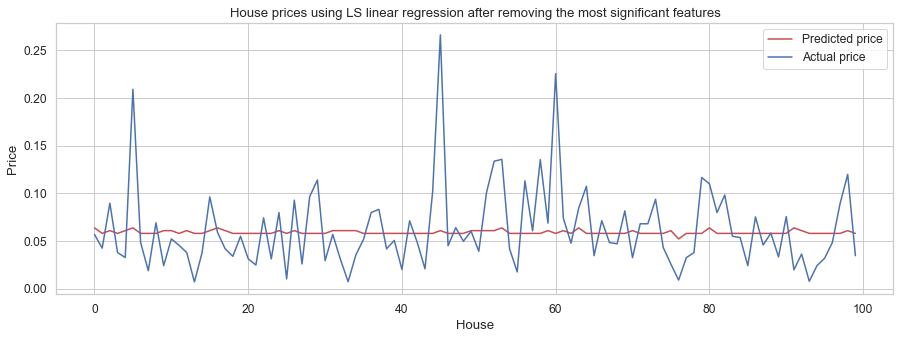

In [48]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(Y_predicted_leastsig_lr[100:200], 'r')
plt.plot(T_test_leastsig[100:200], 'b')
plt.title('House prices using LS linear regression after removing the most significant features')
plt.xlabel('House')
plt.ylabel('Price')
plt.legend(['Predicted price', 'Actual price'])
plt.show()

In [50]:
mean_squared_error(T_test_leastsig, Y_predicted_leastsig_lr, squared = False)

0.0428643791362932

In [51]:
lms = LMS(0.001)
lms.train(X_train_leastsig, T_train_leastsig)
Y_predicted_leastsig_lms = lms.use(X_test_leastsig)

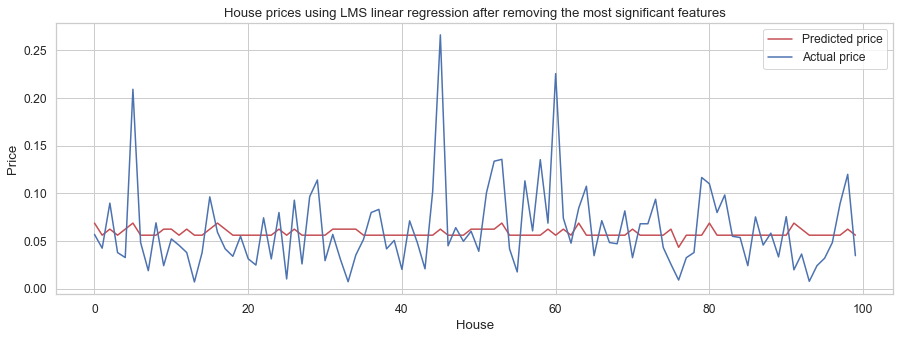

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(Y_predicted_leastsig_lms[100:200], 'r')
plt.plot(T_test_leastsig[100:200], 'b')
plt.title('House prices using LMS linear regression after removing the most significant features')
plt.xlabel('House')
plt.ylabel('Price')
plt.legend(['Predicted price', 'Actual price'])
plt.show()

In [53]:
mean_squared_error(T_test_leastsig, Y_predicted_leastsig_lms, squared = False)

0.04402873301767326

### Observations
The performance goes down significantly when the most significant features and taken out of the data for LS linear regression. The LMS regression does not show as much of a change though.

## Removing the least significant features

In [54]:
X = data[['sqft_living', 'grade', 'no_of_bedrooms_and_bathrooms']].copy()
T = data['price'].copy()

X = (X - X.min())/(X.max() - X.min())
T = (T - T.min())/(T.max() - T.min())

X_train_mostsig = np.array(X.iloc[:4000])
T_train_mostsig = np.array(T.iloc[:4000])

X_test_mostsig = np.array(X.iloc[4000:])
T_test_mostsig = np.array(T.iloc[4000:])

In [55]:
lr = LinearRegress()
lr.train(X_train_mostsig, T_train_mostsig)
Y_predicted_mostsig_lr = lr.use(X_test_mostsig)

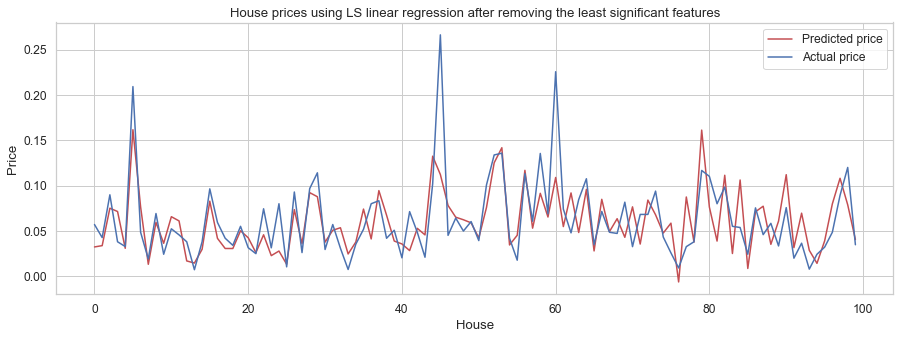

In [56]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(Y_predicted_mostsig_lr[100:200], 'r')
plt.plot(T_test_mostsig[100:200], 'b')
plt.title('House prices using LS linear regression after removing the least significant features')
plt.xlabel('House')
plt.ylabel('Price')
plt.legend(['Predicted price', 'Actual price'])
plt.show()

In [57]:
mean_squared_error(T_test_mostsig, Y_predicted_mostsig_lr, squared = False)

0.028728864663677457

In [58]:
lms = LMS(0.001)
lms.train(X_train_mostsig, T_train_mostsig)
Y_predicted_mostsig_lms = lms.use(X_test_mostsig)

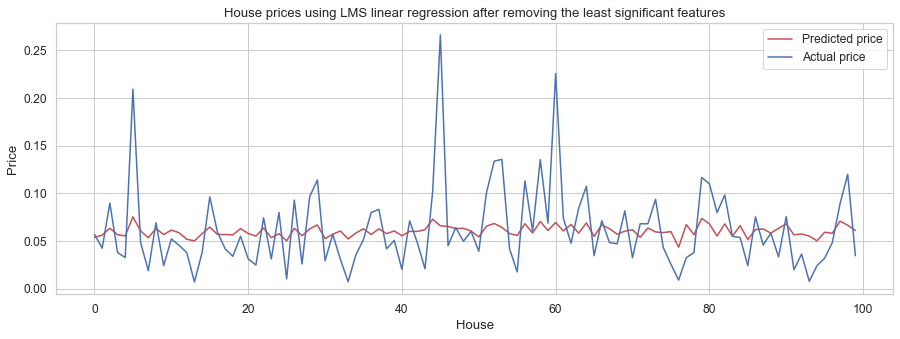

In [59]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(Y_predicted_mostsig_lms[100:200], 'r')
plt.plot(T_test_mostsig[100:200], 'b')
plt.title('House prices using LMS linear regression after removing the least significant features')
plt.xlabel('House')
plt.ylabel('Price')
plt.legend(['Predicted price', 'Actual price'])
plt.show()

In [60]:
mean_squared_error(T_test_mostsig, Y_predicted_mostsig_lms, squared = False)

0.03973719180275404

### Observations
The performance of both LS and LMS is better when the least significant features are removed as compared to when the most significant features are removed. However the performance for this data is still lower than that of the overall features.

## Residual plots and analysis
### Residual plots for LS and LMS without significant features

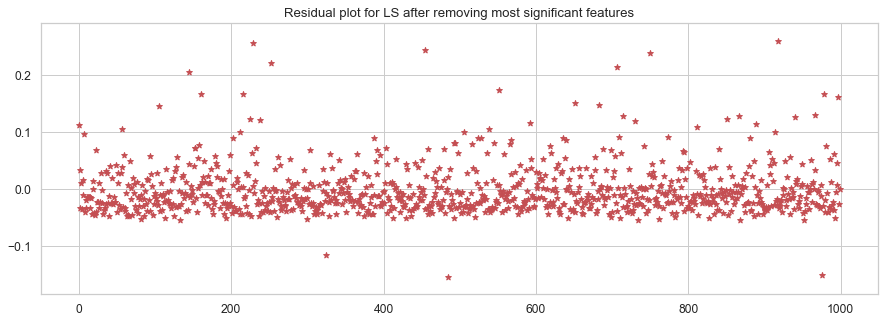

In [61]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_x = range(len(T_test_leastsig))
plot_y = T_test_leastsig - Y_predicted_leastsig_lr
plt.scatter(plot_x, plot_y, marker='*', color='r')
plt.title("Residual plot for LS after removing most significant features")
plt.show()

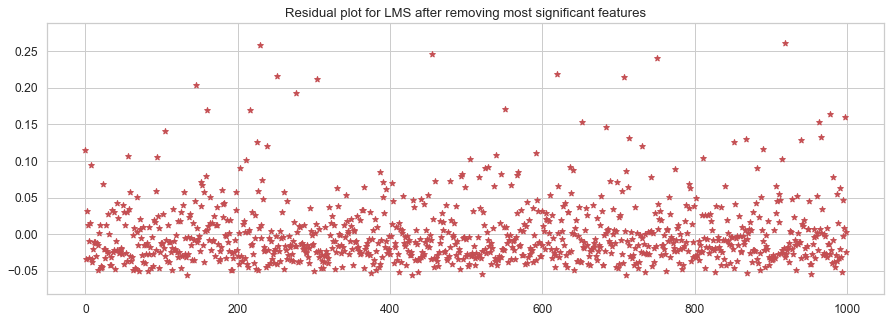

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_x = range(len(T_test_leastsig))
plot_y = T_test_leastsig - Y_predicted_leastsig_lms[:, 0]
plt.scatter(plot_x, plot_y, marker='*', color='r')
plt.title("Residual plot for LMS after removing most significant features")
plt.show()

##### Residual plots for data without least significant features

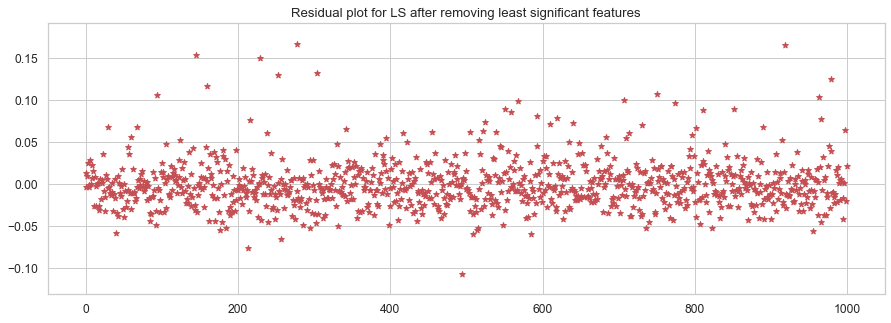

In [63]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_x = range(len(T_test_mostsig))
plot_y = T_test_mostsig - Y_predicted_mostsig_lr
plt.scatter(plot_x, plot_y, marker='*', color='r')
plt.title("Residual plot for LS after removing least significant features")
plt.show()

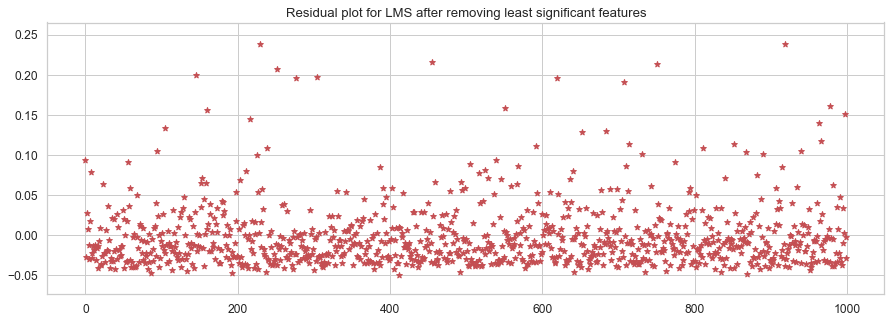

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
plot_x = range(len(T_test_mostsig))
plot_y = T_test_mostsig - Y_predicted_mostsig_lms[:, 0]
plt.scatter(plot_x, plot_y, marker='*', color='r')
plt.title("Residual plot for LMS after removing least significant features")
plt.show()

### Residual plot analysis
The residual plots show that removing the least significant features does not affect the data as much as removing the most significant features, as evidenced by the changing range of the plot.